In [74]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [75]:
df = pd.read_csv('heart.csv')

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x = df.drop('target', axis=1)
y = df.pop('target')

In [80]:
y.value_counts().unique()

array([165, 138], dtype=int64)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=0) 

In [82]:
x_test.value_counts().sum()

91

In [83]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth=7)

In [84]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [85]:
preds_test = dt_model.predict(x_test)
preds_train = dt_model.predict(x_train)

In [126]:
round(accuracy_score(y_train, preds_train),3)*100


98.6

In [125]:
round(accuracy_score(y_test, preds_test),3)*100

75.8

In [88]:
from sklearn import tree

In [89]:
train_char_label = ['No', 'Yes']

In [90]:
train_tree_file = open('train_tree.dot', 'w')

In [91]:
dot_data = tree.export_graphviz(dt_model, out_file=train_tree_file, feature_names=list(x_train), class_names=train_char_label)

In [92]:
train_tree_file.close()

In [93]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [94]:
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [95]:
train_tree_regularized = open('train_tree_regularized.dot', 'a')

dot_data = tree.export_graphviz(reg_dt_model, out_file=train_tree_regularized, feature_names=list(x_train), class_names=train_char_label)

train_tree_regularized.close()

## Prediction

In [96]:
reg_dt_model.feature_importances_

array([0.03329785, 0.04896136, 0.43841361, 0.00260221, 0.        ,
       0.        , 0.        , 0.05021219, 0.        , 0.08901448,
       0.        , 0.21138956, 0.12610874])

In [97]:
print(pd.DataFrame(dt_model.feature_importances_, columns=['Imp'], index=x_train.columns))

               Imp
age       0.056346
sex       0.056416
cp        0.268492
trestbps  0.028319
chol      0.069979
fbs       0.029735
restecg   0.013516
thalach   0.049158
exang     0.021546
oldpeak   0.149242
slope     0.050561
ca        0.129459
thal      0.077231


In [127]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns=['Imp'], index=x_train.columns))

               Imp
age       0.033298
sex       0.048961
cp        0.438414
trestbps  0.002602
chol      0.000000
fbs       0.000000
restecg   0.000000
thalach   0.050212
exang     0.000000
oldpeak   0.089014
slope     0.000000
ca        0.211390
thal      0.126109


In [99]:
# Get the predictions for train and test data

ytrain_predict = reg_dt_model.predict(x_train);
ytest_predict = reg_dt_model.predict(x_test);

In [100]:
# Get the proportions/probability for the train and test data

ytrain_predict_proba = reg_dt_model.predict_proba(x_train);
ytest_predict_proba = reg_dt_model.predict_proba(x_test);

In [101]:
print(ytrain_predict, ytrain_predict_proba)
print(ytest_predict, ytest_predict_proba)

[0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1] [[0.5        0.5       ]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.         1.        ]
 [0.72727273 0.27272727]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.2        0.8       ]
 [0.72727273 0.27272727]
 [0.20689655 0.79310345]
 [1.         0.        ]
 [0.5        0.5       ]
 [0.20689655 0.79310345]
 [0.20689655 0.79310345]
 [0.1        0.9       ]
 [0.07142857 0.92857143]
 [0.7        0.3       ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.    

In [132]:
round(roc_auc_score(y_test,dt_model.predict_proba(x_test)[:,1]),6)*100

75.7979

## CART

In [102]:
import matplotlib.pyplot as plt

In [103]:
probs = reg_dt_model.predict_proba(x_train)

In [104]:
probs = probs[:, 1]

In [105]:
from sklearn.metrics import roc_auc_score

In [106]:
auc_train = roc_auc_score(y_train, probs)

In [107]:
auc_train

0.9324287774972954

In [108]:
probs_test = reg_dt_model.predict_proba(x_test)[:, 1]

In [109]:
auc_test = roc_auc_score(y_test, probs_test)
auc_test

0.834139264990329

In [110]:
from sklearn.metrics import roc_curve

In [111]:
fpr, tpr, thresholds = roc_curve(y_train, probs)

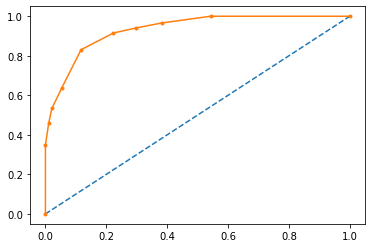

In [112]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

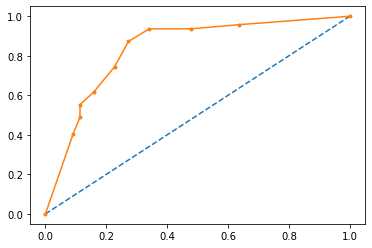

In [113]:
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker = '.')
plt.show()

# Create Classification Report and Confusion Matrix


In [114]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

In [115]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.90      0.83      0.86       118

    accuracy                           0.85       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.86      0.85      0.85       212



In [116]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.78      0.74      0.76        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



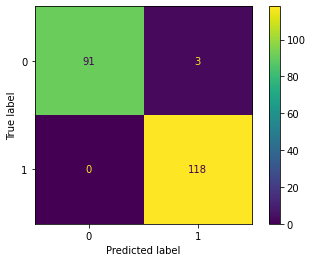

In [141]:
ytrain_predict1 = dt_model.predict(x_train);
confusion_matrix(y_train, ytrain_predict1)

plot_confusion_matrix(dt_model,x_train, y_train);
plt.grid(b=False, axis='both');

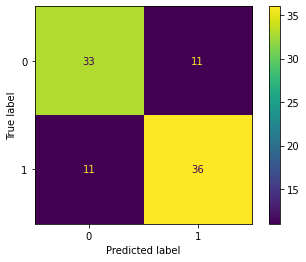

In [142]:
ytest_predict1 = dt_model.predict(x_test);
confusion_matrix(y_test, ytest_predict1)

plot_confusion_matrix(dt_model,x_test, y_test);
plt.grid(b=False, axis='both');

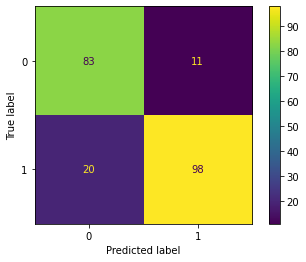

In [118]:
plot_confusion_matrix(reg_dt_model,x_train, y_train);
plt.grid(b=False, axis='both');

In [119]:
confusion_matrix(y_test, ytest_predict)

array([[34, 10],
       [12, 35]], dtype=int64)

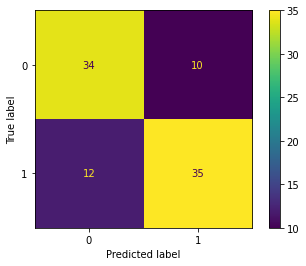

In [120]:
plot_confusion_matrix(reg_dt_model,x_test, y_test);
plt.grid(b=False, axis='both');

In [121]:
#Test Data Accuracy
reg_dt_model.score(x_test,y_test)

0.7582417582417582

In [122]:
reg_dt_model.score(x_train,y_train)

0.8537735849056604